In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ipython_memwatcher import MemWatcher
mw = MemWatcher()
mw.start_watching_memory()

In [2] used 0.234 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 42.965 MiB


# Ideal Point Estimation Testing

We want to test our gradient based method of ideal point estimation, against the PyMC3 model.

In [3]:
import ideal_point.ideal_point as ip

In [3] used 79.559 MiB RAM in 1.066s, peaked 0.000 MiB above current, total RAM usage 122.523 MiB


## Generate Test Data

In [4]:
df = ip.test_data(10)

In [4] used 0.652 MiB RAM in 0.004s, peaked 0.000 MiB above current, total RAM usage 123.176 MiB


In [44]:
df.head()

,legislator,position,vote
0,0,1,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [44] used 0.000 MiB RAM in 0.008s, peaked 0.000 MiB above current, total RAM usage 152.203 MiB


## Train model

In [113]:
from altair import *
import pandas as pd

In [113] used 1.578 MiB RAM in 0.059s, peaked 0.000 MiB above current, total RAM usage 128.109 MiB


In [117]:
def plot_params(params):
    rows = []
    for key, value in params.items():
        for (i, v) in enumerate(value):
            rows.append({
                'i': i,
                'param': key,
                'value': v
            })
    df = pd.DataFrame(rows)
    return Chart(df).mark_circle().encode(
        column='param:N',
        x='i:O',
        y='value:Q'
    )

In [117] used 0.055 MiB RAM in 0.007s, peaked 0.000 MiB above current, total RAM usage 128.355 MiB


### PyMC3 ADVI

In [144]:
pymc_params = ip.advi_params(ip.create_model(df)).means

Average ELBO = -62.734: 100%|██████████| 25000/25000 [00:04<00:00, 5029.00it/s]
Finished [100%]: Average ELBO = -62.767


In [144] used 0.211 MiB RAM in 6.897s, peaked 0.000 MiB above current, total RAM usage 191.836 MiB


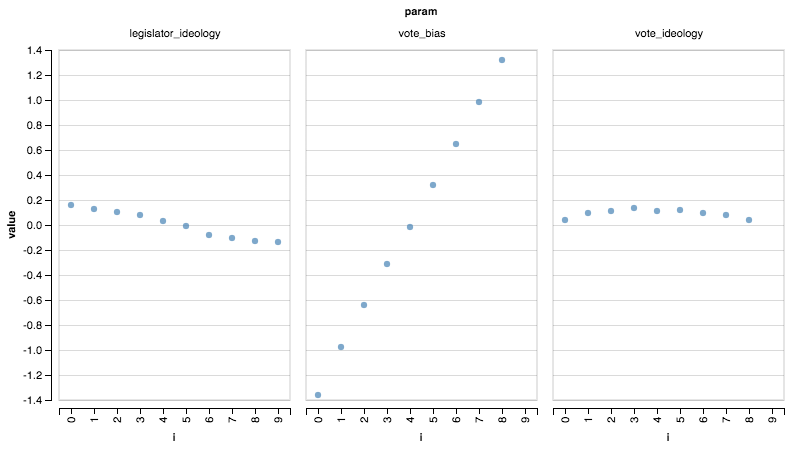

In [145] used 0.012 MiB RAM in 0.022s, peaked 0.000 MiB above current, total RAM usage 191.848 MiB


In [145]:
plot_params(pymc_params)

The `vote_ideology` should match with the `legislator_ideology`. The first vote should be close ot the first legislator, and the last vote should be close to the last legislator (in ideology).

### PyMC3 Sampling

In [146]:
from pymc3 import find_MAP
from pymc3 import NUTS, sample

model=ip.create_model(df)
with model:
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -56.408: 100%|██████████| 200000/200000 [00:39<00:00, 5006.17it/s]
Finished [100%]: Average ELBO = -56.496
100%|██████████| 2000/2000 [00:10<00:00, 186.28it/s]


In [146] used 2.383 MiB RAM in 55.870s, peaked 0.000 MiB above current, total RAM usage 194.230 MiB


In [147]:
from pymc3 import forestplot

In [147] used 0.000 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 194.230 MiB


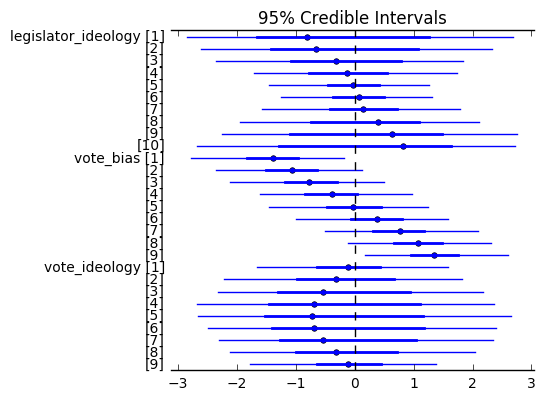

In [148] used 0.559 MiB RAM in 0.511s, peaked 0.000 MiB above current, total RAM usage 194.789 MiB


In [148]:
forestplot(trace)

Same problem here...

### Manual Gradient

In [149]:
from ideal_point.gradient import Gradient 
from scipy.special import expit as logistic


In [149] used 0.000 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 194.789 MiB


In [150]:
g = Gradient(df)
g.run(50)

-61.2870630483
-31.5162025563
-16.0917311815
-11.9175813463
-9.77096049133

In [150] used 0.059 MiB RAM in 4.031s, peaked 0.000 MiB above current, total RAM usage 194.848 MiB


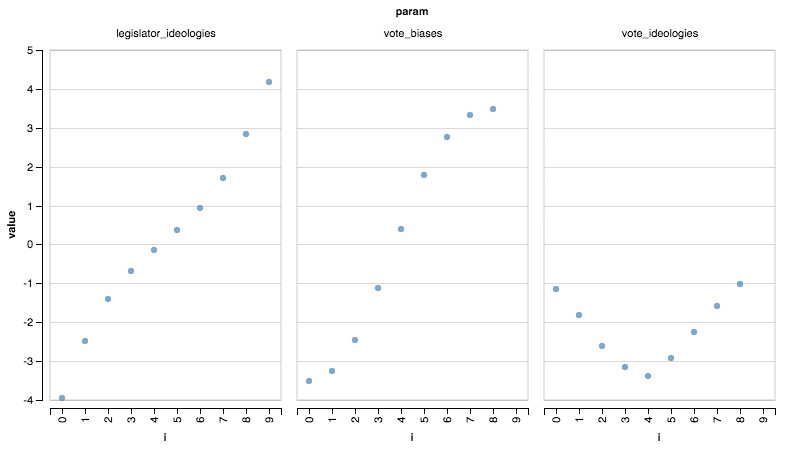

In [151] used 0.000 MiB RAM in 0.022s, peaked 0.000 MiB above current, total RAM usage 194.848 MiB


In [151]:
plot_params(g.params)

It will keep improving the log likelihood, but it will keep this basic pattern... Which is wrong! Like I said above for PyMC3 ADVI. 